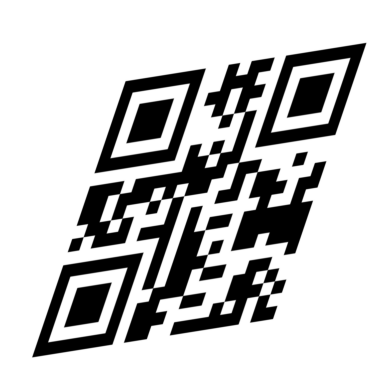

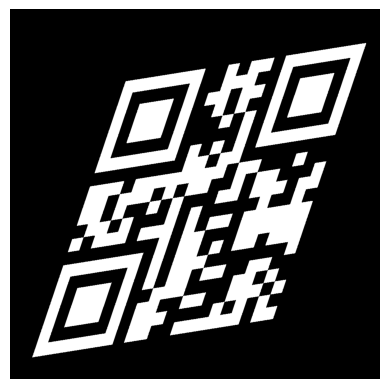

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def invert_colors(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Invert colors
    inverted_image = cv2.bitwise_not(image)

    # Display the inverted image
    return inverted_image

# Example usage
image_path = "/content/06-Railfence-cipher.png"
originalImage=cv2.imread(image_path)
ivertedImage=invert_colors(image_path)
_, binarized_image = cv2.threshold(ivertedImage, 127, 255, cv2.THRESH_BINARY)
plt.imshow(originalImage, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()
plt.imshow(binarized_image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()


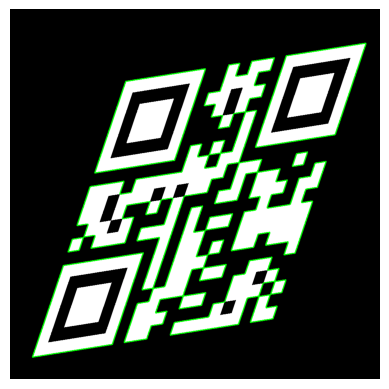

In [2]:
def find_contours(image):
    # Read the image


    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find contours
    contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    image_with_contours = image.copy()
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

    return image_with_contours
contours=find_contours(binarized_image)
plt.imshow(contours, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()


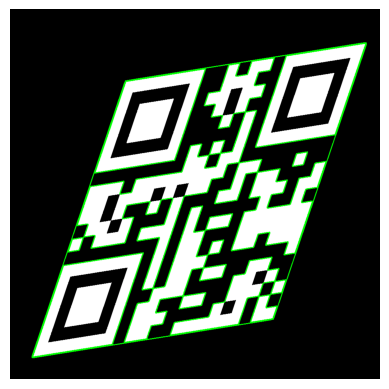

In [3]:
def find_combined_convex_hull(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find contours
    contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty list to store all points of contours
    all_contour_points = []
    for contour in contours:
        all_contour_points.extend(contour)

    # Convert the list to numpy array format
    all_contour_points = np.array(all_contour_points)

    # Find the convex hull of all contour points
    convex_hull = cv2.convexHull(all_contour_points)

    # Draw the convex hull on the original image
    image_with_convex_hull = image.copy()
    #to draw the convex hull
    cv2.drawContours(image_with_convex_hull, [convex_hull], -1, (0, 255, 0), 2)

    return image_with_convex_hull, convex_hull

convexhull,ch=find_combined_convex_hull(contours)
plt.imshow(convexhull, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

[[974  93]]
[[719 848]]
[[ 60 952]]
[[316 196]]


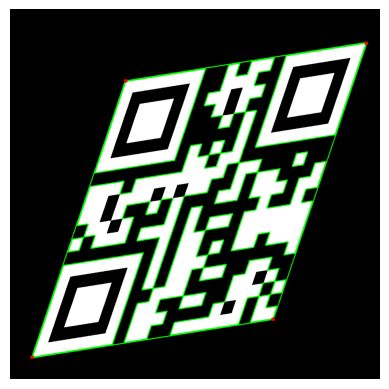

In [4]:
def get_convex_hull_corners(convex_hull):
    epsilon = 0.02 * cv2.arcLength(convex_hull, True)
    approx_corners = cv2.approxPolyDP(convex_hull, epsilon, True)
    return approx_corners

corners=get_convex_hull_corners(ch)
for corner in corners:
    cv2.circle(convexhull, tuple(corner[0]), 5, (255, 0, 0), -1)
    print(corner)
plt.imshow(convexhull, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()


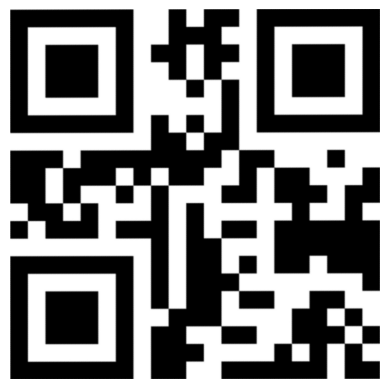

In [5]:
# Define the corners of the destination rectangle (order: top-left, top-right, bottom-right, bottom-left)
dst_corners = np.array([ [1000, 0], [1000, 1000], [0, 1000],[0, 0]], dtype=np.float32)

# Perform perspective transform
perspective_matrix = cv2.getPerspectiveTransform(corners.astype(np.float32), dst_corners)
perspective_result = cv2.warpPerspective(originalImage, perspective_matrix, (1000, 1000))


_, binarized = cv2.threshold(perspective_result, 128, 255, cv2.THRESH_BINARY)
# Plot the result
plt.imshow(perspective_result, cmap='gray')
plt.axis('off')
plt.show()